# Math functions defined recursively

## Factorial

In [1]:
def fact(n):
    if n==0: return 1
    return n * fact(n-1)

In [2]:
for i in range(12): print(f"{i}: {fact(i)}")

0: 1
1: 1
2: 2
3: 6
4: 24
5: 120
6: 720
7: 5040
8: 40320
9: 362880
10: 3628800
11: 39916800


In [3]:
def factloop(n):
    r = 1
    for i in range(1,n+1):
        r *= i
    return r

In [4]:
for i in range(12): print(f"{i}: {factloop(i)}")

0: 1
1: 1
2: 2
3: 6
4: 24
5: 120
6: 720
7: 5040
8: 40320
9: 362880
10: 3628800
11: 39916800


## Fibonacci

In [5]:
def fib(n):
    if n==0 or n==1: return 1
    return fib(n-1) + fib(n-2)

In [6]:
for i in range(12): print(f"{i}: {fib(i)}")

0: 1
1: 1
2: 2
3: 3
4: 5
5: 8
6: 13
7: 21
8: 34
9: 55
10: 89
11: 144


In [7]:
%timeit -r 1 -n 1 fib(37)

8.02 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
def cachefib(n):
    F = [0 for i in range(n+1)]
    F[0] = F[1] = 1
    # work up not down
    for i in range(2,n+1): 
        F[i] = F[i-1] + F[i-2]
    return F[n]    

In [9]:
%timeit -r 1 -n 1 cachefib(1000)

209 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Binary search

In [10]:
def binsearch(a,x):
    left = 0; right = len(a)-1
    while left<=right:    
        mid = int((left + right)/2)
        if a[mid]==x: return mid 
        if x < a[mid]: right = mid-1
        else: left = mid+1
    return -1

In [11]:
binsearch(range(10), 333)

-1

In [12]:
def binsearch(a,x,left,right):
    print(left, right)
    if left > right: return -1
    mid = int((left + right)/2)
    if a[mid]==x: return mid 
    if x < a[mid]:
        return binsearch(a,x,left,mid-1)
    else:
        return binsearch(a,x,mid+1,right)

a = range(10)
n = len(a)
binsearch(a,5,0,n-1)

0 9
5 9
5 6


5

# Merge sort

In [13]:
def msort(A):
    if len(A)==1:
        return A
    if len(A)==2:
        return A if A[0]<A[1] else [A[1],A[0]]
    mid = int(len(A)/2)
    left = msort(A[:mid])
    right = msort(A[mid:])
    return sorted(left + right)

In [16]:
import numpy as np
A = list(np.random.randint(0,100,10))
print(A)
r = msort(A)
print(np.array(r))

[61, 91, 18, 72, 40, 92, 20, 58, 83, 38]
[18 20 38 40 58 61 72 83 91 92]


## Compute powers of 2

In [82]:
def pow2(n):
    if n==0: return 1
    return 2 * pow2(n-1)

[pow2(i) for i in range(8)]

In [85]:
def pow2(n):
    v = 1
    for i in range(n): v *= 2
    return v
[pow2(i) for i in range(8)]

[1, 2, 4, 8, 16, 32, 64, 128]

In [89]:
def pow2(n):
    if n==0: return 1
    half = pow2(int(n/2))
    if n % 2==0: # if even
        return half * half
    return 2 * half * half
[pow2(i) for i in range(8)]

[1, 2, 4, 8, 16, 32, 64, 128]

# PLAYGROUND

Sampling without replacement; sampling std=0.31125
Sampling with replacement; sampling std=0.31302


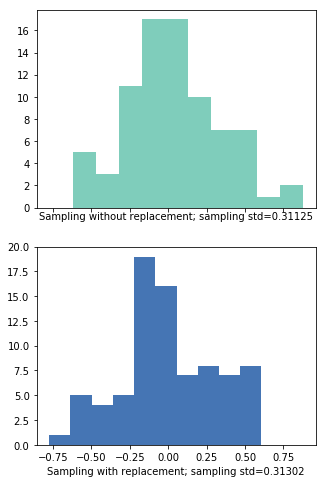

In [74]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 1
X = np.random.normal(mu, sigma, 100000)

trials = 80
ssize=10

fig, axes = plt.subplots(2,1,sharex=True,figsize=(5,8))

sample_means = []
for t in range(trials):
    s = np.random.choice(X, size=ssize, replace=False)
    sample_means.append( np.mean(s) )

bootstrap_sample_means = []
for t in range(trials):
    s = np.random.choice(X, size=ssize, replace=True)
    bootstrap_sample_means.append( np.mean(s) )

print(f"Sampling without replacement; sampling std={np.std(sample_means):.5f}")
print(f"Sampling with replacement; sampling std={np.std(bootstrap_sample_means):.5f}")

axes[0].hist(sample_means, color='#7fcdbb')
axes[0].set_xlabel(f"Sampling without replacement; sampling std={np.std(sample_means):.5f}")
axes[1].hist(bootstrap_sample_means, color='#4575b4')
axes[1].set_xlabel(f"Sampling with replacement; sampling std={np.std(bootstrap_sample_means):.5f}")
plt.show()